In [1]:
from sympy import *
import numpy as np
import math as mt
import matplotlib.pyplot as plt

In [2]:
def rel_err(x,y):
    return abs((x-y)/y)

In [3]:
x = symbols('x')

In [4]:
integrate(1/(1+9*x**2),(x,-1,5))

atan(3)/3 + atan(15)/3

In [5]:
Q = (mt.atan(3)+mt.atan(15))/3
print(Q)

0.9177579784724424


# Задание1

In [6]:
func = lambda x: 1/(1+9*x**2)

In [7]:
def trapez(func, a, b, nint=1):
    integral = 0.0
    step = (b-a)/nint
    x_j = a
    for k in range(nint):
        integral += 0.5*(func(x_j)+func(x_j+step))*step
        x_j += step
    return integral

In [8]:
dx = np.linspace(1, 10000, 1112)
err_trapez=[]
for k in range(len(dx)):
    I = trapez(func, -1, 5, int(dx[k]))
    err_trapez.append(rel_err(I, Q))

Теор погрешность: $R \le \max_{[a,b]}|f''(x)| \frac{(b-a)^3}{12n^2}$

$f''(x) = \frac{18\,(27x^2 -1)}{(1+9x^2)^3}$

$\max_{[-1,5]} |f''(x)|= 18$

Тогда теор погрешность $R \le 18 \cdot \frac{(5-(-1)^3)}{12 \cdot n^2} = \frac{324}{n^2}$

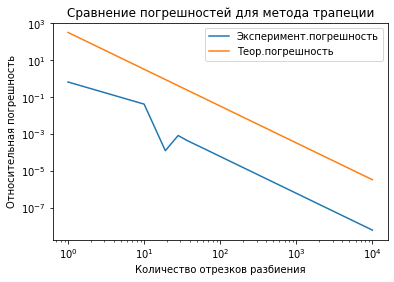

In [9]:
plt.figure()
plt.title('Сравнение погрешностей для метода трапеции')
plt.loglog(dx, err_trapez, label="Эксперимент.погрешность")
plt.loglog(dx, 324/(dx**2), label="Теор.погрешность")
plt.xlabel("Количество отрезков разбиения")
plt.ylabel("Относительная погрешность")
plt.legend()
plt.show()

In [10]:
def Simps(func, a, b, nint=1):
    integral = 0.0
    step = (b-a)/nint
    x_j = a
    for k in range(nint):
        integral += (func(x_j)+func(x_j+step)+4*func(x_j+step/2))*step/6
        x_j += step
    return integral

In [11]:
err_Simps=[]
for k in range(len(dx)):
    I = Simps(func, -1, 5, int(dx[k]))
    err_Simps.append(rel_err(I, Q))

Теор погрешность: $R \le \max_{[a,b]}|f^{(4)}(x)| \frac{(b-a)\cdot h^4}{2880}$

$f^{(4)}(x) = \frac{1944\,(405x^4-90x^2+1)}{(1+9x^2)^5}$

$\max_{[-1,5]} |f^{(4)}(x)|= 1944$

Тогда теор погрешность $R \le 1944 \cdot \frac{6h^4}{2880} = \frac{81h^4}{20}$

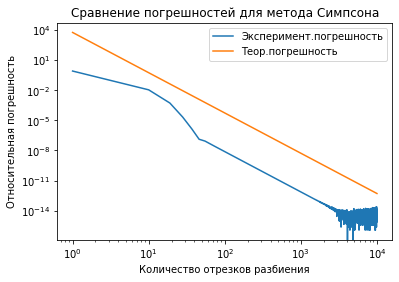

In [12]:
plt.figure()
plt.title('Сравнение погрешностей для метода Симпсона')
plt.loglog(dx, err_Simps, label="Эксперимент.погрешность")
plt.loglog(dx, 81/20*(6/dx)**4, label="Теор.погрешность")
plt.xlabel("Количество отрезков разбиения")
plt.ylabel("Относительная погрешность")
plt.legend()
plt.show()

In [13]:
def runge_trapez(f, a, b, eps=10**(-6)):
    N = 1
    Delta = 1
    while Delta>eps:
        Delta = abs(trapez(f, a, b, 2*N)- trapez(f, a, b, N))/3
        N = N*2
    return N

def runge_simps(f, a, b, eps=10**(-6)):
    N = 1
    Delta = 1
    while Delta>eps:
        Delta = abs(Simps(f, a, b, 2*N)- Simps(f, a, b, N))/15
        N = N*2
    return N

In [14]:
print('Необходимое число отрезков разбиения для метода трапеции по методу Рунге:',runge_trapez(func, -1, 5))
print('Необходимое длина шага разбиения:', 6/(runge_trapez(func, -1, 5)))
print('Необходимое число отрезков разбиения для метода Симпсона по методу Рунге:',runge_simps(func, -1, 5))
print('Необходимое длина шага разбиения:', 6/(runge_simps(func, -1, 5)))

Необходимое число отрезков разбиения для метода трапеции по методу Рунге: 1024
Необходимое длина шага разбиения: 0.005859375
Необходимое число отрезков разбиения для метода Симпсона по методу Рунге: 64
Необходимое длина шага разбиения: 0.09375


In [15]:
for k in range(len(dx)):
    I = trapez(func, -1, 5, int(dx[k]))
    if abs(I-Q)< 10**(-6):
        print('Необходимое число отрезков разбиения для метода трапеции по факту:',dx[k])
        print('Необходимое длина шага разбиения:', 6/dx[k])
        break

Необходимое число отрезков разбиения для метода трапеции по факту: 739.0
Необходимое длина шага разбиения: 0.008119079837618403


In [16]:
for k in range(30,50,1):
    I = Simps(func, -1, 5, k)
    if abs(I-Q)< 10**(-6):
        print('Необходимое число отрезков разбиения для метода Симпсона по факту:',k)
        print('Необходимое длина шага разбиения:', 6/k)
        break

Необходимое число отрезков разбиения для метода Симпсона по факту: 38
Необходимое длина шага разбиения: 0.15789473684210525


Для приближенного поиска значения определенного интеграла перейдем от $\int \limits_{a}^{b} f(x) dx$ к $\sum \limits_{i=1}^{n} w_i f(x_i)$. Где $w_i$ - искомые веса. Можно заменить $f(x)$ на ее полиномиальную интерполяцию (полиномы Лагранжа): $f(x)= \sum \limits_{i=1}^{N} f(x_i) L_{i}^{N}(x) + r_N(x)$. Тогда квадратурная формула будет выглядеть следующим образом: $I = \sum \limits_{i=1}^{n} \lambda_i f(x_i) + \int \limits_{a}^{b} r_N (x) dx$, $\;$ где $\lambda_i = \int \limits_{a}^{b} \prod \limits_{k \ne i} \frac{x-x_k}{x_i - x_k}dx$. Значит будем искать веса $\lambda_i$ по этой формуле.

In [17]:
#Начнем с того, что будем рассматривать равномерную сетку
n = 2 #число весовых множителей (узлов)
h = 2/(n-1) #шаг разбиения
dx = [-1+(i-1)*h for i in range(1,n+1)] #сама сетка

In [18]:
def Lagr(a, b, n):
    def L_k(k, dx):
        x = symbols('x')
        L = 1.0
        for p in range(k):
            L = L*(x-dx[p])/(dx[k]-dx[p])
        for p in range(k+1,len(dx)):
            L = L*(x-dx[p])/(dx[k]-dx[p])        
        return L
    
    mas=[]
    h = (b-a)/(n-1)
    dx = [a+(i-1)*h for i in range(1,n+1)]
    for k in range(len(dx)):
        x = symbols('x')
        mas.append(integrate(L_k(k, dx),(x,a,b))/(b-a)) 
    
    return mas

In [19]:
qw = Lagr(-1, 1, 3) # n=2 - трапеция, n=3 - Симпсон
print('Весовые множители:',qw)
qw = np.array(qw)
print('Нормировка',sum(qw))

#Симметричность можно заметить из того, что qw[i]=qw[n-i]

Весовые множители: [0.166666666666667, 0.666666666666667, 0.166666666666667]
Нормировка 1.00000000000000


In [20]:
for b in range(2,1000): 
    if min(np.array(Lagr(-1, 1, b))) < 0:
        print('Отрицательные веса появляются при',b,'узлах')
        print(np.array(Lagr(-1, 1, b)))
        break

Отрицательные веса появляются при 9 узлах
[0.0348853615520282 0.207689594356260 -0.0327336860670213
 0.370229276895937 -0.160141093474426 0.370229276895945
 -0.0327336860670195 0.207689594356260 0.0348853615520282]


# Задание2

In [21]:
import scipy.special as sp
import scipy.optimize as op

In [22]:
def Leg_root(n):
    def PM_check(func, interval):
        for k in range(len(interval)-1):
            if func(interval[k])*func(interval[k+1])>0:
                interval = np.insert(interval, k+1, (interval[k]+interval[k+1])/2)
                interval = np.insert(interval, len(interval)-k-1, -(interval[k]+interval[k+1])/2)
        return interval
            
    Leg = lambda x: sp.eval_legendre(n,x)
    step = 2/n
    dx = [-1 + step*(i-1) for i in range(1,n+2)]
    dx = PM_check(Leg, dx)
    Ans=[]
    for p in range(len(dx)-1):
        bracket=[dx[p], dx[p+1]]
        if Leg(bracket[0])*Leg(bracket[1])<0:
            sol = op.root_scalar(Leg, bracket=bracket, method='brentq')
            Ans.append(sol.root)
    return np.array(Ans)

In [23]:
n = 2 #порядок полинома Лежандра
print('Найденные корни:',np.around(Leg_root(n),8))
Ans = sp.roots_legendre(n)
print('Корни из scipy',Ans[0])

Найденные корни: [-0.57735027  0.57735027]
Корни из scipy [-0.57735027  0.57735027]


Веса и точки для квадратурной формулы Гаусса можно найти из системы уравнений: $\sum \limits_{i=0}^{n} a_i t_i^k = \frac{1-(-1)^{k+1}}{k+1}, k=0,1,..,n$.

Так как мы уже знаем точки (корни полиномов Лежандра), то осталось найти веса $a_i$ из равенства $T \cdot A =B$, где $А$ - вектор-столбец весов, $T$ - матрица, состоящая из корней полинома Лежандра стпени от 0 до n, $B$ - вектор-столбец из правой части ситсемы уравнений.

In [24]:
def Gwei(n):
    B = np.array([(1-(-1)**(i+1))/(i+1) for i in range(n)])
    #print(B)
    t = sp.roots_legendre(n)[0]
    T=np.zeros((1,n))
    for i in range(n):
        ti = t**i
        T = np.insert(T, i+1, ti, axis=0)
        np.vstack((T,ti))
    T = np.delete(T, 0, axis=0)
    #print(T)
    A = np.linalg.solve(T,B)
    return A

In [25]:
weights = Gwei(3)
print('Веса квадратурной формулы Гауса:', weights)

Веса квадратурной формулы Гауса: [0.55555556 0.88888889 0.55555556]


In [26]:
n=25
I = Gwei(n) @ (func(sp.roots_legendre(n)[0]))
print(I)

0.8326972982969485


Погрешность квадратурной формулы Гаусса с $n$ узлами можно найти по формуле $|R_n(f)| \le \frac{\max_{[a,b]}|f^{(2n)}(x)| (n!)^4}{((2n)!)^3(2n+1)} (b-a)^{2n+1}$

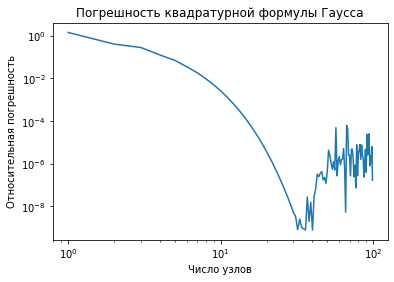

In [27]:
N = [k for k in range(1,100)]
Gaus_err = [rel_err(Gwei(k) @ (func(sp.roots_legendre(k)[0])), float(integrate(1/(1+9*x**2),(x,-1,1)))) for k in range(1,100)]

plt.figure()
plt.title('Погрешность квадратурной формулы Гаусса')
plt.loglog(N, Gaus_err)
plt.xlabel("Число узлов")
plt.ylabel("Относительная погрешность")
plt.show()

# Задание3

Посчитаем аналитически интеграл, чтобы найти интервал, нужный для получения интеграла с заданной точностью. Для этого разобьем интеграл на два: основная часть и остаток:

$$\int \limits_{0}^{+\infty} e^{-x} \cos{\omega x} dx = \int \limits_{0}^{A} e^{-x} \cos{\omega x} dx + \int \limits_{A}^{+\infty} e^{-x} \cos{\omega x} dx = I(A) + R(A)$$

Будем оценивать остаток:

$$R(A) = -\cfrac{ e^{-A} \left( \omega \sin{\omega A} - \cos{\omega A} \right)}{1+\omega^2} \Rightarrow |R(A)|< \varepsilon$$

$$I(A) = \cfrac{(\omega \cdot \sin{\omega A} - \cos{\omega A})e^{-A}+1}{1+\omega^2}$$

$$I = \cfrac{1}{1+\omega^2}$$

Используем полученную функцию, чтобы найти $A$ для заданного $\epsilon$

$\int \limits_{0}^{A} f(x) \cos{\omega x} dx = Re \left(\int \limits_{0}^{A} f(x) e^{i \omega x} dx \right) = Re \left( \sum \limits_{j=0}^{N} \frac{x_{j+1} - x_j}{2} e^{(i-1) \frac{x_{j+1}+x_j}{2}} \int \limits_{-1}^{1} e^{(i-1)\frac{x_{j+1}-x_j}{2}t} dt \right) = Re \left( \sum \limits_{j=1}^{N} \frac{x_{j+1}-x_j}{2} e^{(i-1)\frac{x_{j+1}+x_j}{2}} (g(-1)A_1(\Omega) + g(1) A_2(\Omega)) \right)$

$g(x) = e^{-\frac{x_{j+1}-x_j}{2}x}$

$\Omega = \frac{x_{j+1} - x_j}{2}$

$A_{1,2}(\omega) = \frac{\sin{\omega}}{\omega} \mp \frac{\cos{\omega}}{i \omega} \pm \frac{\sin{\omega}}{i \omega^2} $

In [49]:
def Filon(w, N):
    def Interval(func, a=0, eps=10**(-6)): #функция для нахождения достаточного отрезка интегрирования
        Err = 1
        b = 1
        while Err>eps:
            Err = func(b)
            b = b+1
        return round(b)
    
    def A1(x):  #весовая функция формулы Филона
        return (1j*x*mt.sin(x) - x*mt.cos(x) + mt.sin(x))/(1j*x**2)
    
    def A2(x):  #весовая функция формулы Филона
        return (1j*x*mt.sin(x) + x*mt.cos(x) - mt.sin(x))/(1j*x**2)
    
    func3 = lambda A: abs(((-w*mt.sin(w*A) + mt.cos(w*A))*mt.exp(-A))/(1+w*w)) #функция остатка R(A)
    
    a = 0
    b = Interval(func3)
    step = (b-a)/N
    
    dx = [a + step*k for k in range(N+1)]
    Int = 0.0
    
    F = step/2 * (mt.exp(step/2)*A1(w*step/2).real + mt.exp(-step/2)*A2(w*step/2).real)
    
    for k in range(len(dx)-1):
        s = -dx[k] - step/2
        Int = Int + mt.exp(s) * mt.cos(-w*s) * F         
        
    return Int

In [53]:
w = 100
N = 10
eps = 10**(-6)
FIn = Filon(w, N)
In = 1/(1+w**2)
while abs(FIn -In) > eps:
    N = N*2
    FIn = Filon(w, N)
print('Точное значение интеграла:',In)
print('Значение интеграла через формулу Филона:',FIn)
print('Число разбиений интервала интегрирования для достижения заданной точности:',N)

Точное значение интеграла: 9.999000099990002e-05
Значение интеграла через формулу Филона: 9.967514988399004e-05
Число разбиений интервала интегрирования для достижения заданной точности: 5120


Теперь хотим оценить погрешность метода и найти зависимость от шага.

$$R_N (f) \leq \int \limits_{0}^{+\infty} |f(x) - p_N (x)| dx = \int \limits_{0}^{+\infty} |e^{-x} - p_N(x)| dx \leq \int \limits_{0}^{+\infty} |r_N(x)| dx $$

Этот результат совпадает с асимптотикой погрешности для формул Ньютона-Котеса и имеет зависимость порядка $h^{N+1}$.

# Задание4

В теор. части к этому заданию дана формула для билинейной интерполяции на квадрате $[0,1] \times [0,1]$. Но для интерполяции функции $f(x,y) = \cos{(x+xy)}$ на квадрате $[0,\pi] \times [0,\pi]$ воспользуемся следующей формулой: 

$$f(x,y) \approx \frac{y_2 - y}{y_2 - y_1} \cdot \left( \frac{x_2 - x}{x_2 - x_1} f(x_1, y_1) + \frac{x - x_1}{x_2 - x_1} f(x_1, y_2) \right) + \frac{y - y_1}{y_2 - y_1} \cdot \left( \frac{x_2 - x}{x_2 - x_1} f(x_2, y_1) + \frac{x - x_1}{x_2 - x_1} f(x_2, y_2) \right)$$

In [72]:
func4 = lambda x,y: mt.cos(x+x*y)

Создадим две линейные сетки, разделенные на $N$ частей. Далее создадим общую сетку, где будем ее разбивать на $m^2$ квадратов, в каждом из которых будем интерполирвать нашу функцию по формуле выше. Затем уже сравним полученный результат со значениями функции в узлах интерполяции.

In [73]:
def FPoint(func, a, b, N=1000):
    st = (b-a)/N
    dx = [a + i*st for i in range(N+1)]
    dy = [a + i*st for i in range(N+1)]
    dxy = np.zeros((len(dx),len(dy)), dtype=complex)
    for i in range(len(dx)):
        for k in range(len(dy)):
            dxy[i][k] = complex(dx[i],dy[k])
            
    x = dxy.shape[0]
    y = dxy.shape[1]
    
    Mas = np.zeros((x,y))
    for i in range(x):
        for k in range(y):
            Mas[i][k] = func(dxy[i][k].real, dxy[i][k].imag)
        
    return Mas

def FInterpol(func, a, b, m, N=1000):
    st = (b-a)/N
    dx = [a + i*st for i in range(N+1)]
    dy = [a + i*st for i in range(N+1)]
    dxy = np.zeros((len(dx),len(dy)), dtype=complex)
    for i in range(len(dx)):
        for k in range(len(dy)):
            dxy[i][k] = complex(dx[i],dy[k])
    
    stepx = (b-a)/m
    stepy = (b-a)/m  
    
    Mas = np.zeros((dxy.shape[0],dxy.shape[1]))
    for i in range(dxy.shape[0]):
        for k in range(dxy.shape[1]):
            y = dxy[i][k].imag
            x = dxy[i][k].real
            nx = int(x // stepx)
            ny = int(y // stepy)
            x1, x2 = nx*stepx, (nx+1)*stepx
            y1, y2 = ny*stepy, (ny+1)*stepy
            Q1 = (y2-y)/(y2-y1)
            Q2 = (y-y1)/(y2-y1)
            W1 = (x2-x)/(x2-x1)
            W2 = (x-x1)/(x2-x1)
            Mas[i][k] = Q1*(W1*func(x1,y1)+W2*func(x1,y2)) + Q2*(W1*func(x2,y1)+W2*func(x2,y2))
            
    return Mas

In [74]:
a = 0 #нижняя граница квадрата
b = mt.pi #верхняя граница квадрата

<function matplotlib.pyplot.show(*args, **kw)>

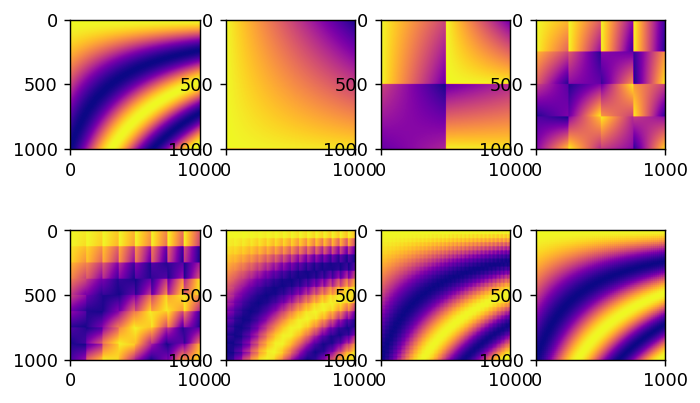

In [75]:
FFine = FPoint(func4, a, b) #точное значение функции в узлах интерпояциия

err_mas = [] 

plt.figure(dpi=128)
plt.subplot(2,4,1)
plt.imshow(FFine, cmap="plasma")
for k in range(7):
    FInt = FInterpol(func4, a, b, 2**k)
    plt.subplot(2,4,k+2)
    plt.imshow(FInt, cmap="plasma")
    err_mas.append(np.max(abs(FInt-FFine)))
#     plt.subplot(1,2,2)
#     plt.imshow(FFine, cmap="plasma")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

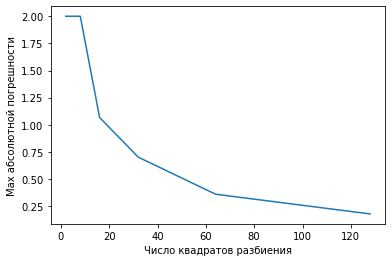

In [93]:
ind = [2**(k+1) for k in range(len(err_mas))]
plt.figure()
plt.plot(ind, err_mas)
plt.xlabel('Число квадратов разбиения')
plt.ylabel('Max абсолютной погрешности')
plt.show

# Задание5

In [3]:
def func5(x,y,z,w):
    
    def norm4(x,y,z,w):
        return x**2 + y**2 + z**2 + w**2
    
    if norm4(x,y,z,w)<=1:
        return 1
    else:
        return 0

Для $\mathbb{R}^4$ воспользуемся следующей формулой для интегрирования:

$$\int \limits_{D} f(x,y,z,w) dx dy dz dw = \sum \limits_{i=0}^{n-1} \sum \limits_{j=0}^{n-1} \sum \limits_{k=0}^{n-1} \sum \limits_{m=0}^{n-1} \frac{\Delta x_i \Delta y_j \Delta z_k \Delta w_m}{16} \bigg[ f(x_i,y_j,z_k,w_m) + f(x_i,y_j,z_k,w_{m+1}) + f(x_i,y_j,z_{k+1},w_m) + f(x_i,y_j,z_{k+1},w_{m+1}) + f(x_i,y_{j+1},z_k,w_m) + f(x_i,y_{j+1},z_k,w_{m+1}) + f(x_i,y_{j+1},z_{k+1},w_m) + f(x_i,y_{j+1},z_{k+1},w_{m+1}) + f(x_{i+1},y_j,z_k,w_m) + f(x_{i+1},y_j,z_k,w_{m+1}) + f(x_{i+1},y_j,z_{k+1},w_m) + f(x_{i+1},y_j,z_{k+1},w_{m+1}) + f(x_{i+1},y_{j+1},z_k,w_m) + f(x_{i+1},y_{j+1},z_k,w_{m+1}) + f(x_{i+1},y_{j+1},z_{k+1},w_m) + f(x_{i+1},y_{j+1},z_{k+1},w_{m+1}) \bigg]$$

In [4]:
def Int4dim(func, a, b, N=30):
    st = (b-a)/N
    dx = [a + i*st for i in range(N+1)]
    dy = [a + i*st for i in range(N+1)]
    dz = [a + i*st for i in range(N+1)]
    dw = [a + i*st for i in range(N+1)]
    
    Integral = 0
    
    for i in range(len(dx)-1):
        for j in range(len(dy)-1):
            for k in range(len(dz)-1):
                for m in range(len(dw)-1):
                    xi = dx[i]
                    xi1 = dx[i+1]
                    yj = dy[j]
                    yj1 = dy[j+1]
                    zk = dz[k]
                    zk1 = dz[k+1]
                    wm = dw[m]
                    wm1 = dw[m+1]
                    Integral += st*st*st*st/16 *(func(xi,yj,zk,wm) + func(xi,yj,zk,wm1) + func(xi,yj,zk1,wm) + func(xi,yj,zk1,wm1) +func(xi,yj1,zk,wm) + func(xi,yj1,zk,wm1) + func(xi,yj1,zk1,wm) + func(xi,yj1,zk1,wm1) + func(xi1,yj,zk,wm) + func(xi1,yj,zk,wm1) + func(xi1,yj,zk1,wm) + func(xi1,yj,zk1,wm1) + func(xi1,yj1,zk,wm) + func(xi1,yj1,zk,wm1) + func(xi1,yj1,zk1,wm) + func(xi1,yj1,zk1,wm1))
    
    return Integral

<function matplotlib.pyplot.show(*args, **kw)>

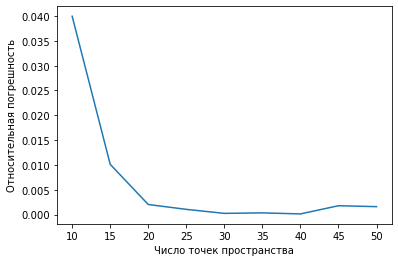

In [8]:
err5 = []
ind = [N for N in range(10,51,5)]
for k in ind:
    err5.append(rel_err(Int4dim(func5,-1,1,k), mt.pi**2 /2))

plt.figure()
plt.plot(ind, err5)
plt.xlabel('Число точек пространства')
plt.ylabel('Относительная погрешность')
plt.show

# Задание6

In [9]:
func6 = lambda x,y,z,w: mt.cos(x**2 +2*y**2 + 3*z**2 + 4*w**2)

In [30]:
Int4dim(func6, 0, 1 , 40)

-0.23649323666961186

In [15]:
def Int4dimSimpson(func, a, b, N=30):
    st = (b-a)/N
    dx = [a + i*st for i in range(N+1)]
    dy = [a + i*st for i in range(N+1)]
    dz = [a + i*st for i in range(N+1)]
    dw = [a + i*st for i in range(N+1)]
    
    Integral = 0
    
    for i in range(len(dx)-1):
        for j in range(len(dy)-1):
            for k in range(len(dz)-1):
                for m in range(len(dw)-1):
                    xi = dx[i]
                    xi1 = dx[i+1]
                    xx = (xi + xi1)/2
                    yj = dy[j]
                    yj1 = dy[j+1]
                    yy = (yj + yj1)/2
                    zk = dz[k]
                    zk1 = dz[k+1]
                    zz = (zk + zk1)/2
                    wm = dw[m]
                    wm1 = dw[m+1]
                    ww = (wm + wm1)/2
                    Integral += (func(xi,yj,zk,wm) + 4*func(xi,yj,zk,ww) + func(xi,yj,zk,wm1) 
                                + func(xi,yj,zk1,wm) + 4*func(xi,yj,zk1,ww) + func(xi,yj,zk1,wm1)
                                + 4*func(xi,yj,zz,wm) + 16*func(xi,yj,zz,ww) + 4*func(xi,yj,zz,wm1)
                                + func(xi,yj1,zk,wm) + 4*func(xi,yj1,zk,ww) + func(xi,yj1,zk,wm1)
                                + func(xi,yj1,zk1,wm) + 4*func(xi,yj1,zk1,ww) + func(xi,yj1,zk1,wm1)
                                + 4*func(xi,yj1,zz,wm) + 16*func(xi,yj1,zz,ww) + 4*func(xi,yj1,zz,wm1)
                                + 4*func(xi,yy,zk,wm) + 16*func(xi,yy,zk,ww) + 4*func(xi,yy,zk,wm1)
                                + 4*func(xi,yy,zk1,wm) + 16*func(xi,yy,zk1,ww) + 4*func(xi,yy,zk1,wm1)
                                + 16*func(xi,yy,zz,wm) + 64*func(xi,yy,zz,ww) + 16*func(xi,yy,zz,wm1)
                                + func(xi1,yj,zk,wm) + 4*func(xi1,yj,zk,ww) + func(xi1,yj,zk,wm1) 
                                + func(xi1,yj,zk1,wm) + 4*func(xi1,yj,zk1,ww) + func(xi1,yj,zk1,wm1)
                                + 4*func(xi1,yj,zz,wm) + 16*func(xi1,yj,zz,ww) + 4*func(xi1,yj,zz,wm1)
                                + func(xi1,yj1,zk,wm) + 4*func(xi1,yj1,zk,ww) + func(xi1,yj1,zk,wm1)
                                + func(xi1,yj1,zk1,wm) + 4*func(xi1,yj1,zk1,ww) + func(xi1,yj1,zk1,wm1)
                                + 4*func(xi1,yj1,zz,wm) + 16*func(xi1,yj1,zz,ww) + 4*func(xi1,yj1,zz,wm1)
                                + 4*func(xi1,yy,zk,wm) + 16*func(xi1,yy,zk,ww) + 4*func(xi1,yy,zk,wm1)
                                + 4*func(xi1,yy,zk1,wm) + 16*func(xi1,yy,zk1,ww) + 4*func(xi1,yy,zk1,wm1)
                                + 16*func(xi1,yy,zz,wm) + 64*func(xi1,yy,zz,ww) + 16*func(xi1,yy,zz,wm1)
                                + 4*(func(xx,yj,zk,wm) + 4*func(xx,yj,zk,ww) + func(xx,yj,zk,wm1) 
                                + func(xx,yj,zk1,wm) + 4*func(xx,yj,zk1,ww) + func(xx,yj,zk1,wm1)
                                + 4*func(xx,yj,zz,wm) + 16*func(xx,yj,zz,ww) + 4*func(xx,yj,zz,wm1)
                                + func(xx,yj1,zk,wm) + 4*func(xx,yj1,zk,ww) + func(xx,yj1,zk,wm1)
                                + func(xx,yj1,zk1,wm) + 4*func(xx,yj1,zk1,ww) + func(xx,yj1,zk1,wm1)
                                + 4*func(xx,yj1,zz,wm) + 16*func(xx,yj1,zz,ww) + 4*func(xx,yj1,zz,wm1)
                                + 4*func(xx,yy,zk,wm) + 16*func(xx,yy,zk,ww) + 4*func(xx,yy,zk,wm1)
                                + 4*func(xx,yy,zk1,wm) + 16*func(xx,yy,zk1,ww) + 4*func(xx,yy,zk1,wm1)
                                + 16*func(xx,yy,zz,wm) + 64*func(xx,yy,zz,ww) + 16*func(xx,yy,zz,wm1)))
    
    return Integral * st**4 / 6**4

In [22]:
Int4dim(func6, 0, 1, 50)

-0.2365879812209869